In [ ]:
Ddfrom google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Baseline: linear regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 📌 1. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_scaled_million.csv')

# 📌 2. 定义评估函数
def evaluate_model(model, X, y, stratify, label="Model", n_splits=5, seeds=[91,22,67,2025,623]):
    rmse_scores, mae_scores, r2_scores = [], [], []
    for seed in seeds:
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
        for train_idx, val_idx in skf.split(X, stratify):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
            mae_scores.append(mean_absolute_error(y_val, y_pred))
            r2_scores.append(r2_score(y_val, y_pred))

    print(f"Baseline Evaluation for {label}")
    print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
    print(f"MAE : {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
    print(f"R²   : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
    # return rmse_scores, mae_scores, r2_scores

# 📌 3. 特征和分层
exclude = ['market_value_million', 'market_value_in_eur', 'position','gk_diving',
        'gk_handling', 'gk_kicking', 'gk_positioning',
        'gk_reflexes', 'position_group', 'name']
X_train = df.drop(columns=exclude)
strata = df['position']

# 📌 4. Baseline Linear Regression
lr = LinearRegression()

# ✅ 使用原始 target
y_train = df['market_value_million']
evaluate_model(lr, X_train, y_train, strata, label="Market Value")



Baseline Evaluation for Market Value
RMSE: 8.1654 ± 0.8233
MAE : 4.7412 ± 0.1274
R²   : 0.5172 ± 0.0264


In [ ]:
# —— 1. 读取测试集 ——
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_scaled_million.csv')

# —— 3. 构造 X_test 和 y_test ——
X_test = test_df.drop(columns=exclude)
# 保证列顺序与训练时的 X 一致
X_test = X_test[X_train.columns]

y_test = test_df['market_value_million']

# —— 4. 在测试集上预测并评估 ——
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test  = mean_absolute_error(y_test, y_pred)
r2_test   = r2_score(y_test, y_pred)

print("Baseline Test Set")
print(f"RMSE: {rmse_test:.4f}")  # 单次测试集评估没有折，直接报告数值
print(f"MAE : {mae_test:.4f}")
print(f"R²  : {r2_test:.4f}")

Baseline Test Set
RMSE: 9.3223
MAE : 4.9193
R²  : 0.5069


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 读取测试集
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_scaled_million.csv')

# 2. 基础设置：X_test, y_test（与训练时同列顺序）
X_test_full = test_df.drop(columns=exclude)
X_test_full = X_test_full[X_train.columns]  # 确保列顺序一致
y_test_full = test_df['market_value_million']

# 3. 定义位置组列表
groups = ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper']

# 4. 对每个位置组进行评估
for grp in groups:
    mask = test_df['position_group'] == grp
    X_grp = X_test_full.loc[mask]
    y_grp = y_test_full.loc[mask]
    y_pred = lr.predict(X_grp)

    rmse = np.sqrt(mean_squared_error(y_grp, y_pred))
    mae  = mean_absolute_error(y_grp, y_pred)
    r2   = r2_score(y_grp, y_pred)

    print(f"\n=== Baseline Test for {grp} ===")
    print(f"Samples: {len(y_grp)}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")



=== Baseline Test for Attacker ===
Samples: 345
RMSE: 13.0442
MAE : 5.9252
R²  : 0.4870

=== Baseline Test for Midfielder ===
Samples: 389
RMSE: 10.2918
MAE : 5.8148
R²  : 0.5604

=== Baseline Test for Defender ===
Samples: 389
RMSE: 7.0235
MAE : 4.4263
R²  : 0.5010

=== Baseline Test for Goalkeeper ===
Samples: 327
RMSE: 4.5999
MAE : 3.3791
R²  : -0.8507


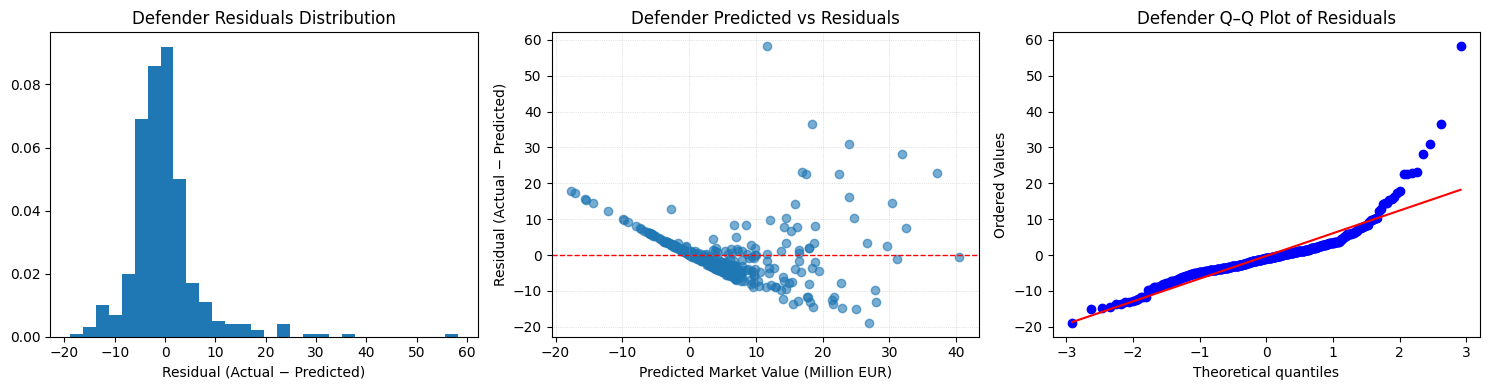

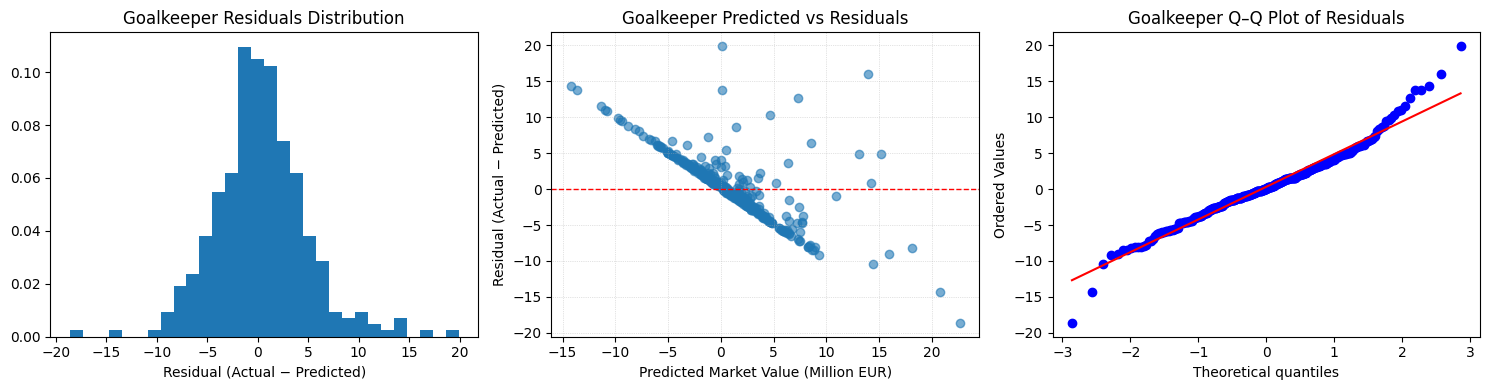

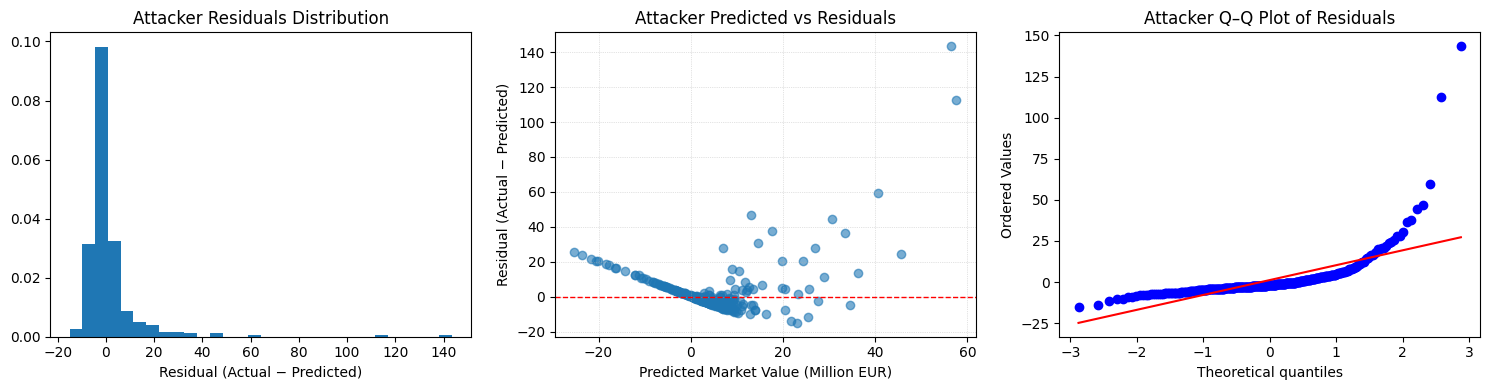

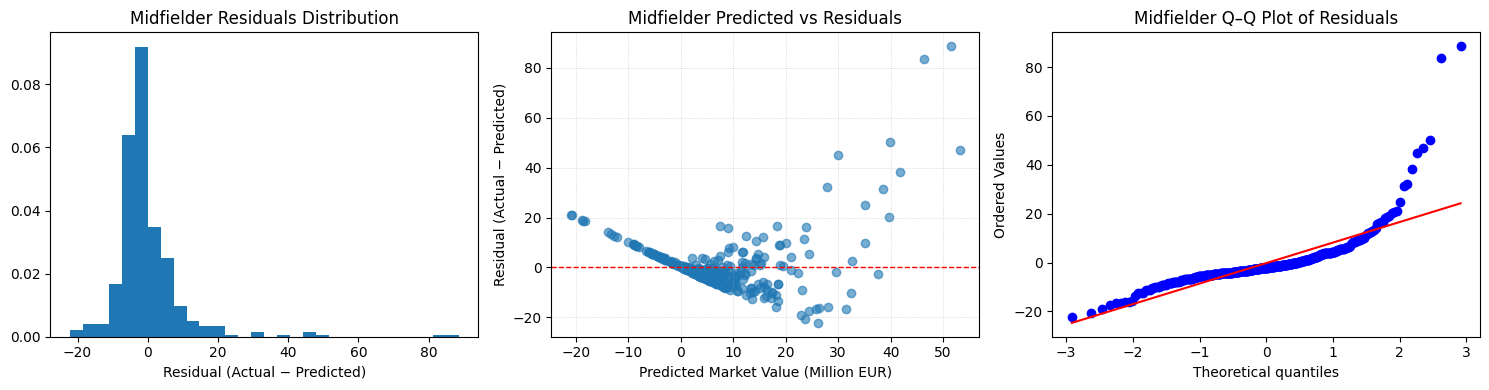

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# —— 1. 读取训练集 ——
train_df = pd.read_csv('/content/drive/MyDrive/fc25_train_scaled_million.csv')

# —— 2. 定义排除列并构造 X_train, y_train ——
exclude = [
    'market_value_million', 'market_value_in_eur', 'position',
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
    'gk_reflexes', 'position_group', 'name'
]
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_million']

# —— 3. 读取测试集并构造 X_test, y_test ——
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_scaled_million.csv')
X_test = test_df.drop(columns=exclude)
# 保证列顺序一致
X_test = X_test[X_train.columns]
y_test = test_df['market_value_million']

# —— 4. 训练并预测 ——
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# —— 5. 把预测和残差放到 test_df ——
test_df = test_df.copy()
test_df['pred']     = y_pred
test_df['residual'] = test_df['market_value_million'] - test_df['pred']

import matplotlib.pyplot as plt
from scipy import stats

# 假设 test_df 已经包含 'position', 'pred', 'residual' 列
positions = test_df['position_group'].unique()

for pos in positions:
    sub = test_df[test_df['position_group'] == pos]
    preds = sub['pred']
    residuals = sub['residual']

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # 1) Residuals Distribution
    axes[0].hist(residuals, bins=30,density=True)
    axes[0].set_title(f'{pos} Residuals Distribution')
    axes[0].set_xlabel('Residual (Actual − Predicted)')

    # 2) Predicted vs Residuals
    axes[1].scatter(preds, residuals, alpha=0.6)
# 加一条水平参考线 y=0
    axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[1].set_title(f'{pos} Predicted vs Residuals')
    axes[1].set_xlabel('Predicted Market Value (Million EUR)')
    axes[1].set_ylabel('Residual (Actual − Predicted)')
# 加网格，增强可读性
    axes[1].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    # 3) Q–Q Plot of Residuals
    stats.probplot(residuals, dist="norm", plot=axes[2])
    axes[2].set_title(f'{pos} Q–Q Plot of Residuals')

    plt.tight_layout()
    plt.show()



Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 📌 1. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_scaled_million.csv')

# 📌 2. 定义评估函数
def evaluate_model(model, X, y, stratify, label="Model", n_splits=5, seeds=[91, 22, 67, 2025, 623]):
    rmse_scores, mae_scores, r2_scores = [], [], []
    for seed in seeds:
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
        for train_idx, val_idx in skf.split(X, stratify):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
            mae_scores.append(mean_absolute_error(y_val, y_pred))
            r2_scores.append(r2_score(y_val, y_pred))

    print(f"RF Evaluation for {label}")
    print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
    print(f"MAE : {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
    print(f"R²  : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
    # return rmse_scores, mae_scores, r2_scores

# 📌 3. 特征和分层
exclude = ['market_value_million', 'market_value_in_eur', 'position','gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'position_group', 'name']
X = df.drop(columns=exclude)
strata = df['position']

# 📌 4. 模型初始化（默认参数）
rf = RandomForestRegressor(
    n_estimators=100,
    max_features='sqrt',  # 会在新版 sklearn 中警告，推荐使用 'sqrt' 替代
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# ✅ 使用原始 target
y = df['market_value_million']
evaluate_model(rf, X, y, strata, label="Market Value")


RF Evaluation for Market Value
RMSE: 6.2836 ± 0.8602
MAE : 2.4304 ± 0.1479
R²  : 0.7144 ± 0.0389


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer, mean_absolute_error

# 1. 读取并准备数据
X = df.drop(columns=exclude)
y = df['market_value_million']

# 2. 定义 5 折 CV 和 MAE scorer
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 3. 定义超参数分布
param_dist = {
    'n_estimators':      randint(50, 200),      # 100–800 棵树
    'max_depth':       [None] + list(range(1, 61)),       # 树深 10–100
    'min_samples_split':   randint(2, 10),         # 内部节点最少样本 2–20
    'min_samples_leaf':   randint(2, 4),         # 叶子节点最少样本 1–20
    'max_features':      ['sqrt', 'log2'],# 常用策略及比例
    'bootstrap':         [True, False]
}

# 4. 初始化模型 & RandomizedSearchCV
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,               # 尝试 80 组参数
    scoring=mae_scorer,
    cv=cv5,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    refit=True
)

# 5. 执行超参搜索
rand_search.fit(X, y)

# 6. 输出最优参数和 CV MAE
print("\n=== RandomizedSearchCV Best RF===")
print("Best params:")
for k, v in rand_search.best_params_.items():
    print(f"  {k}: {v}")
print(f"Best CV MAE: {-rand_search.best_score_:.4f} Million EUR")


Fitting 5 folds for each of 100 candidates, totalling 500 fits

=== RandomizedSearchCV Best RF===
Best params:
  bootstrap: True
  max_depth: 20
  max_features: 0.6
  min_samples_leaf: 3
  min_samples_split: 4
  n_estimators: 124
Best CV MAE: 2.0005 Million EUR


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 📌 1. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_scaled_million.csv')

# 2. 最佳参数
best_params = {
    'bootstrap': False,
    'max_depth': 40,
    'max_features': 'sqrt',
    'min_samples_leaf': 3,
    'min_samples_split': 2,
    'n_estimators': 101,
    'random_state': 42,
    'n_jobs': -1
}

# 3. 训练最终模型
tuned_rf = RandomForestRegressor(**best_params)

# ✅ 使用原始 target
y = df['market_value_million']
evaluate_model(tuned_rf, X, y, strata, label="Tuned RF - Market Value")


📊 Evaluation for Tuned RF - Market Value
RMSE: 6.1663 ± 0.8733
MAE : 2.3236 ± 0.1426
R²  : 0.7247 ± 0.0414


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# 1. 读取训练&测试数据
train_df = pd.read_csv('/content/drive/MyDrive/fc25_train_scaled_million.csv')
test_df  = pd.read_csv('/content/drive/MyDrive/fc25_test_scaled_million.csv')

exclude = [
    'market_value_million','market_value_in_eur','position',
    'gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes',
    'position_group','name'
]
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_million']
X_test  = test_df.drop(columns=exclude)[X_train.columns]
y_test  = test_df['market_value_million']

# 3. 训练最终模型
tuned_rf.fit(X_train, y_train)

# 4. 测试集上预测 & 评估
y_pred_1 = tuned_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_1))
mae  = mean_absolute_error(y_test, y_pred_1)
r2   = r2_score(y_test, y_pred_1)

print("Tuned RF Test Set")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


Tuned RF Test Set
RMSE: 6.0051
MAE : 2.2147
R²  : 0.7954


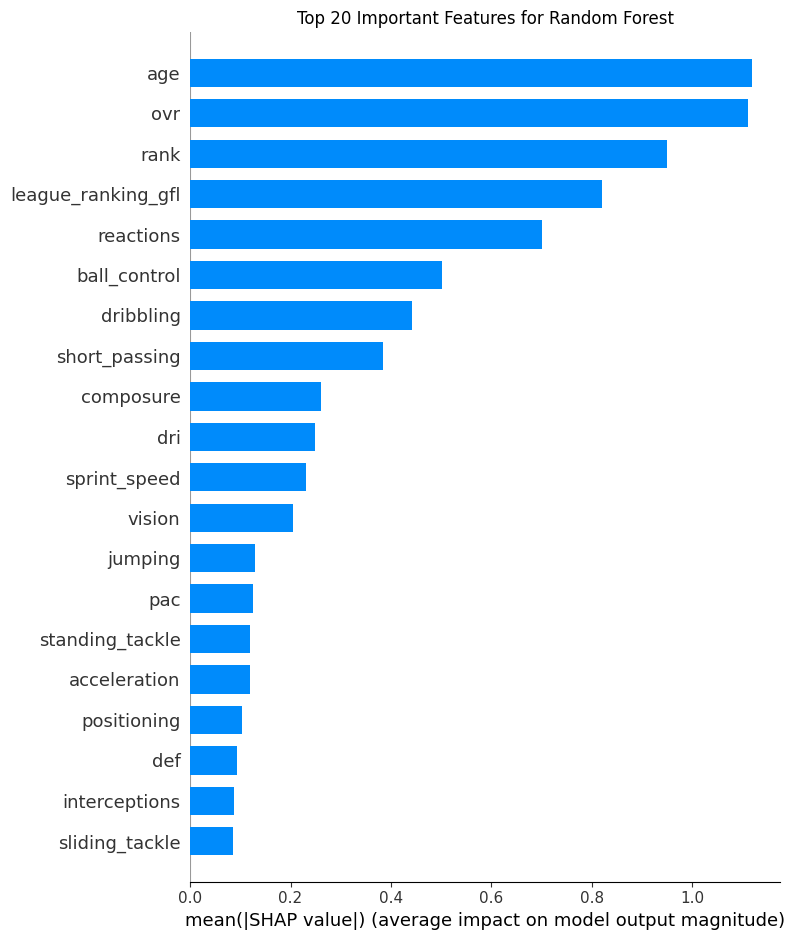

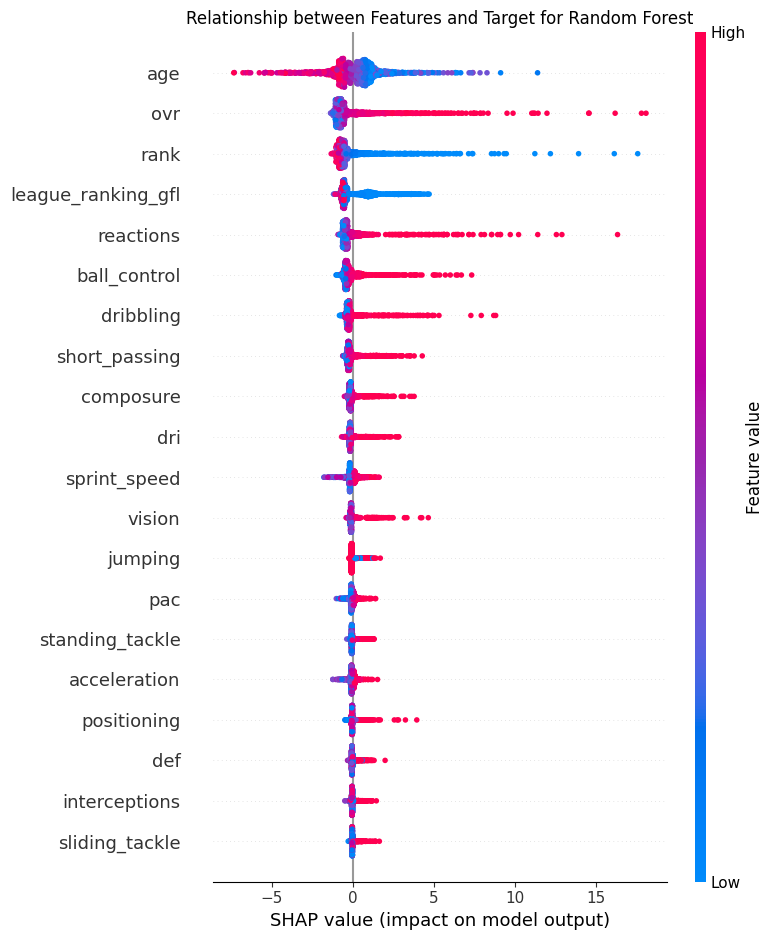

In [ ]:
# —— 1. 导入库 ——
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# —— 1. 直接对全量测试集计算 SHAP 值 ——
# 假设 X_test 是一个 pandas.DataFrame，final_rf 是你训练好的 RandomForestRegressor
explainer = shap.TreeExplainer(tuned_rf)
shap_values_test = explainer.shap_values(X_test)  # 计算量 = n_samples × n_features

# —— 2. 全局重要性可视化（Bar 图）——
shap.summary_plot(
    shap_values_test, X_test,
    plot_type="bar",
    feature_names=X_test.columns,
    max_display=20,
    show=False)
plt.title("Top 20 Important Features for Random Forest")
plt.tight_layout()
plt.show()

# —— 3. 全局关系型重要性（Beeswarm）——
shap.summary_plot(
    shap_values_test, X_test,
    feature_names=X_test.columns,
    max_display=20,
    show=False
)
plt.title("Relationship between Features and Target for Random Forest")
plt.tight_layout()
plt.show()

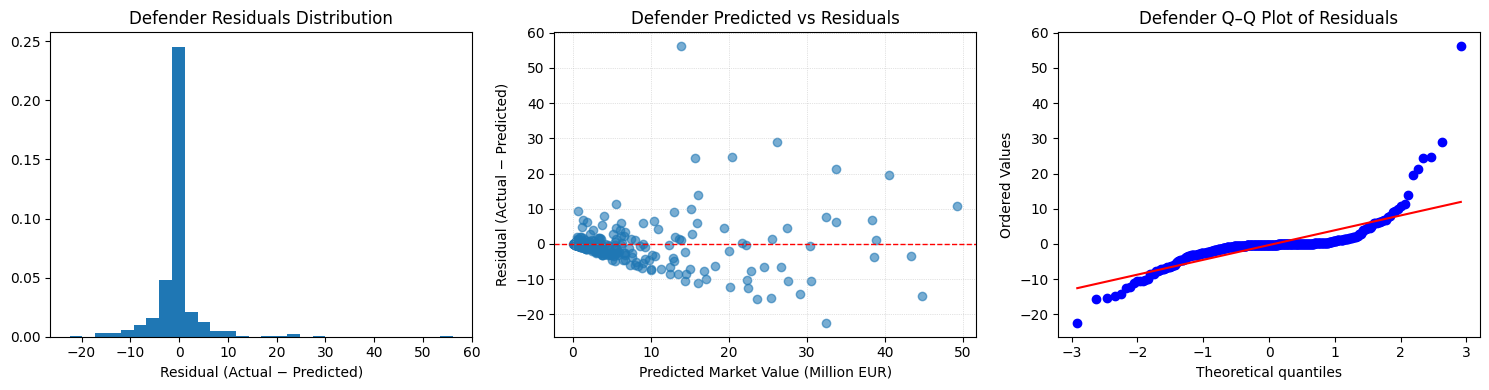

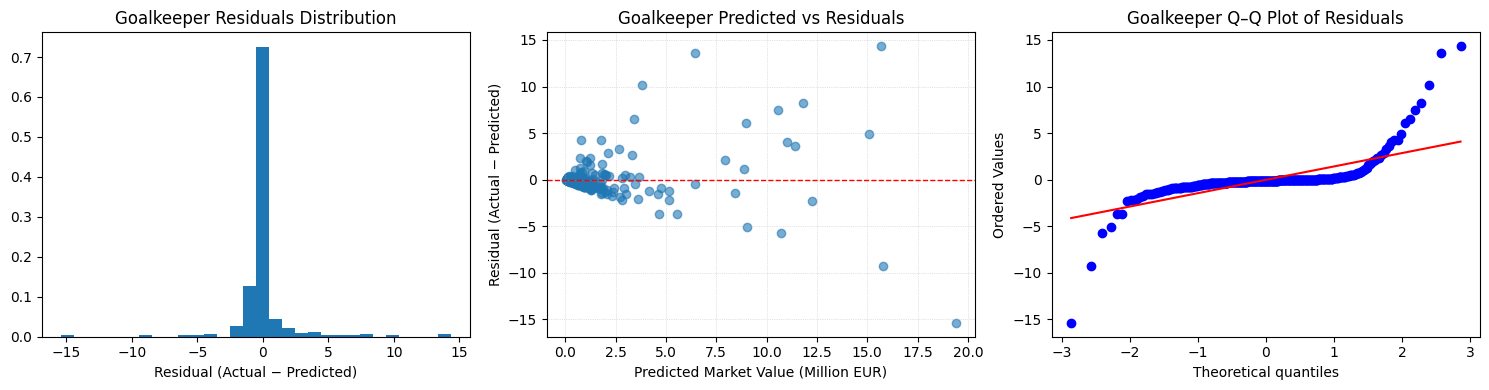

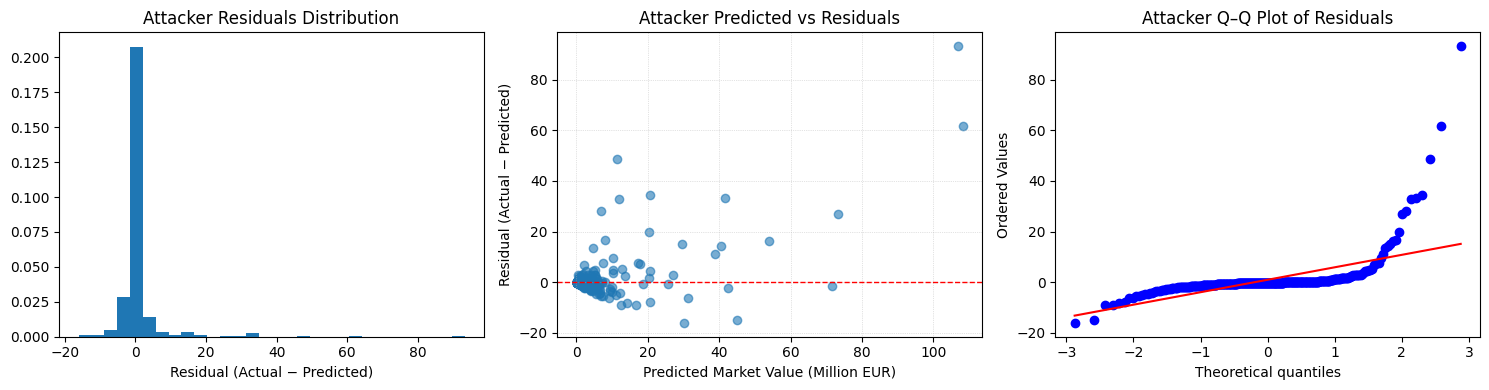

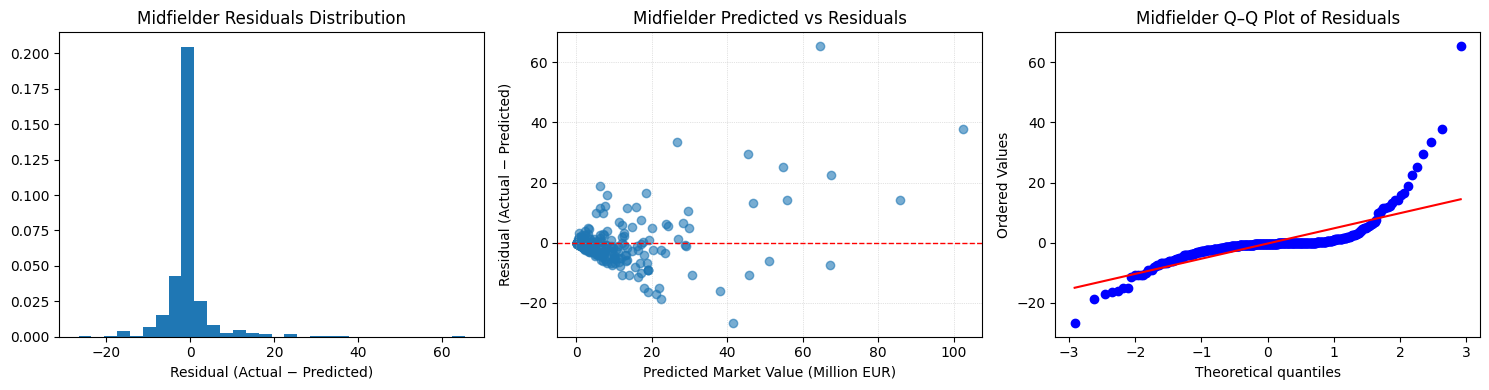

In [ ]:


# —— 1. 读取训练集 ——
train_df = pd.read_csv('/content/drive/MyDrive/fc25_train_scaled_million.csv')

# —— 2. 定义排除列并构造 X_train, y_train ——
exclude = [
    'market_value_million', 'market_value_in_eur', 'position',
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
    'gk_reflexes', 'position_group', 'name'
]
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_million']

# —— 3. 读取测试集并构造 X_test, y_test ——
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_scaled_million.csv')
X_test = test_df.drop(columns=exclude)
# 保证列顺序一致
X_test = X_test[X_train.columns]
y_test = test_df['market_value_million']

# —— 4. 训练并预测 ——


# —— 5. 把预测和残差放到 test_df ——
test_df = test_df.copy()
test_df['pred']     = y_pred_1
test_df['residual'] = test_df['market_value_million'] - test_df['pred']

import matplotlib.pyplot as plt
from scipy import stats

# 假设 test_df 已经包含 'position', 'pred', 'residual' 列
positions = test_df['position_group'].unique()

for pos in positions:
    sub = test_df[test_df['position_group'] == pos]
    preds = sub['pred']
    residuals = sub['residual']

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # 1) Residuals Distribution
    axes[0].hist(residuals, bins=30,density=True)
    axes[0].set_title(f'{pos} Residuals Distribution')
    axes[0].set_xlabel('Residual (Actual − Predicted)')

    # 2) Predicted vs Residuals
    axes[1].scatter(preds, residuals, alpha=0.6)
# 加一条水平参考线 y=0
    axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[1].set_title(f'{pos} Predicted vs Residuals')
    axes[1].set_xlabel('Predicted Market Value (Million EUR)')
    axes[1].set_ylabel('Residual (Actual − Predicted)')
# 加网格，增强可读性
    axes[1].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    # 3) Q–Q Plot of Residuals
    stats.probplot(residuals, dist="norm", plot=axes[2])
    axes[2].set_title(f'{pos} Q–Q Plot of Residuals')

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load test set
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_scaled_million.csv')

# 2. Prepare X_test and y_test (ensure same feature order as training)
exclude = [
    'market_value_million','market_value_in_eur','position',
    'gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes',
    'position_group','name'
]
X_test_full = test_df.drop(columns=exclude)
X_test_full = X_test_full[X_train.columns]  # align columns
y_test_full = test_df['market_value_million']

# 3. Define position groups
groups = ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper']

# 4. Evaluate tuned Random Forest on each subset
for grp in groups:
    idx = test_df['position_group'] == grp
    X_grp = X_test_full.loc[idx]
    y_grp = y_test_full.loc[idx]

    # Predict with your tuned RF model (best_rf)
    y_pred = tuned_rf.predict(X_grp)

    rmse = np.sqrt(mean_squared_error(y_grp, y_pred))
    mae  = mean_absolute_error(y_grp, y_pred)
    r2   = r2_score(y_grp, y_pred)

    print(f"\n=== Tuned RF Test for {grp} ===")
    print(f"Samples: {len(y_grp)}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")



=== Tuned RF Test for Attacker ===
Samples: 345
RMSE: 8.2174
MAE : 2.5574
R²  : 0.7964

=== Tuned RF Test for Midfielder ===
Samples: 389
RMSE: 6.4913
MAE : 2.9182
R²  : 0.8251

=== Tuned RF Test for Defender ===
Samples: 389
RMSE: 5.3819
MAE : 2.4052
R²  : 0.7070

=== Tuned RF Test for Goalkeeper ===
Samples: 327
RMSE: 2.0200
MAE : 0.7897
R²  : 0.6431


XGBoost

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 📌 1. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_scaled_million.csv')

# 📌 2. 定义评估函数
def evaluate_model(model, X, y, stratify, label="Model", n_splits=5, seeds=[91,22,67,2025,623]):
    rmse_scores, mae_scores, r2_scores = [], [], []
    for seed in seeds:
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
        for train_idx, val_idx in skf.split(X, stratify):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
            mae_scores.append(mean_absolute_error(y_val, y_pred))
            r2_scores.append(r2_score(y_val, y_pred))

    print(f"\n📊 Evaluation for {label}")
    print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
    print(f"MAE : {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
    print(f"R²  : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
    # return rmse_scores, mae_scores, r2_scores

# 📌 3. 特征选择与分层
exclude = ['market_value_million', 'market_value_in_eur', 'position','gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'position_group', 'name']
X = df.drop(columns=exclude)
strata = df['position']

# 📌 4. XGBoost 模型（默认参数）
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1,
                         max_depth=3, random_state=42, n_jobs=-1, verbosity=0)


# ✅ 使用原始 market_value_in_eur
y_raw = df['market_value_million']
evaluate_model(xgb_model, X, y_raw, strata, label="XGBoost Default - Market Value")



📊 Evaluation for XGBoost Default - Market Value
RMSE: 5.3030 ± 0.7742
MAE : 2.0983 ± 0.1123
R²  : 0.7955 ± 0.0377


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer, mean_absolute_error

# 1. Load data
df = pd.read_csv('/content/drive/MyDrive/fc25_train_scaled_million.csv')
exclude = [
    'market_value_million','market_value_in_eur','position',
    'gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes',
    'position_group','name'
]
X = df.drop(columns=exclude)
y = df['market_value_million']

# 2. 5-fold CV and MAE scorer
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 3. Hyperparameter distributions for XGBRegressor
param_dist = {
    'n_estimators':    randint(50, 501),       # number of trees
    'max_depth':       randint(3, 11),         # tree depth
    'learning_rate':   uniform(0.01, 0.29),    # eta
    'subsample':       uniform(0.5, 0.5),      # row sampling
    'colsample_bytree':uniform(0.5, 0.5)         # [0,1)# column sampling per tree
}

# 4. Initialize model & RandomizedSearchCV
xgb = XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)
rand_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,               # try 100 combinations
    scoring=mae_scorer,
    cv=cv5,
    random_state=42,
    n_jobs=-1,
    verbose=2,
    refit=True
)

# 5. Run hyperparameter search
rand_search.fit(X, y)

# 6. Output best parameters and CV MAE
print("\n=== RandomizedSearchCV Best for XGBRegressor ===")
print("Best params:")
for k, v in rand_search.best_params_.items():
    print(f"  {k}: {v}")
print(f"Best CV MAE: {-rand_search.best_score_:.4f} Million EUR")



Fitting 5 folds for each of 100 candidates, totalling 500 fits

=== RandomizedSearchCV Best for XGBRegressor ===
Best params:
  colsample_bytree: 0.9650084174054159
  learning_rate: 0.030420677946367727
  max_depth: 4
  n_estimators: 337
  subsample: 0.8355717584120252
Best CV MAE: 1.9574 Million EUR


In [ ]:
# 📌 3. 特征选择与分层
exclude = ['market_value_million', 'market_value_in_eur', 'position','gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'position_group', 'name']
X = df.drop(columns=exclude)
strata = df['position']

# 📌 4. XGBoost 模型（默认参数）
xgb_tuned = rand_search.best_estimator_


# ✅ 使用原始 market_value_in_eur
y_raw = df['market_value_million']
evaluate_model(xgb_tuned, X, y_raw, strata, label="XGBoost Tuned - Market Value")



📊 Evaluation for XGBoost Tuned - Market Value
RMSE: 5.2027 ± 0.7723
MAE : 1.9754 ± 0.1026
R²  : 0.8029 ± 0.0386


In [ ]:
# 假设你已经有一个预先切分好的测试集 CSV
df_test = pd.read_csv('/content/drive/MyDrive/fc25_test_scaled_million.csv')

# 同样做你在训练集上做的所有清洗／预处理
exclude = [
    'market_value_million','market_value_in_eur','position',
    'gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes',
    'position_group','name'
]
X_test = df_test.drop(columns=exclude)
y_test = df_test['market_value_million']

xgb_tuned.fit(X, y_raw)

y_pred_2 = xgb_tuned.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_2))
mae_test  = mean_absolute_error(y_test, y_pred_2)
r2_test   = r2_score(y_test, y_pred_2)

print(f"Test RMSE: {rmse_test:.4f} ")
print(f"Test MAE : {mae_test:.4f} ")
print(f"Test R²  : {r2_test:.4f}")


Test RMSE: 4.6457 
Test MAE : 1.8262 
Test R²  : 0.8775


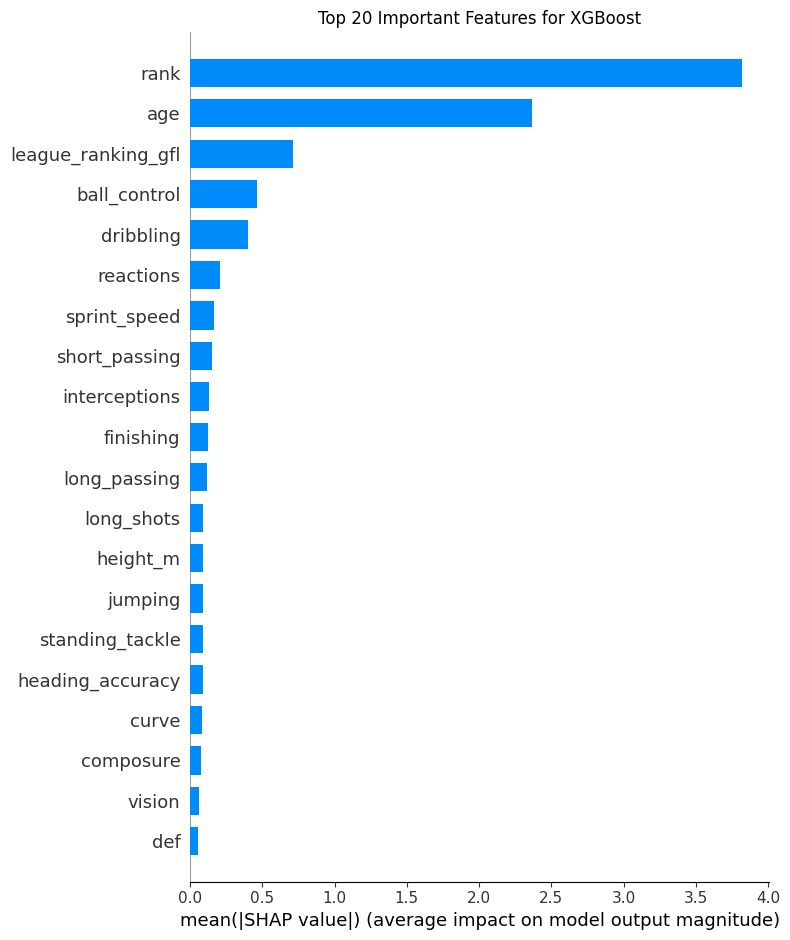

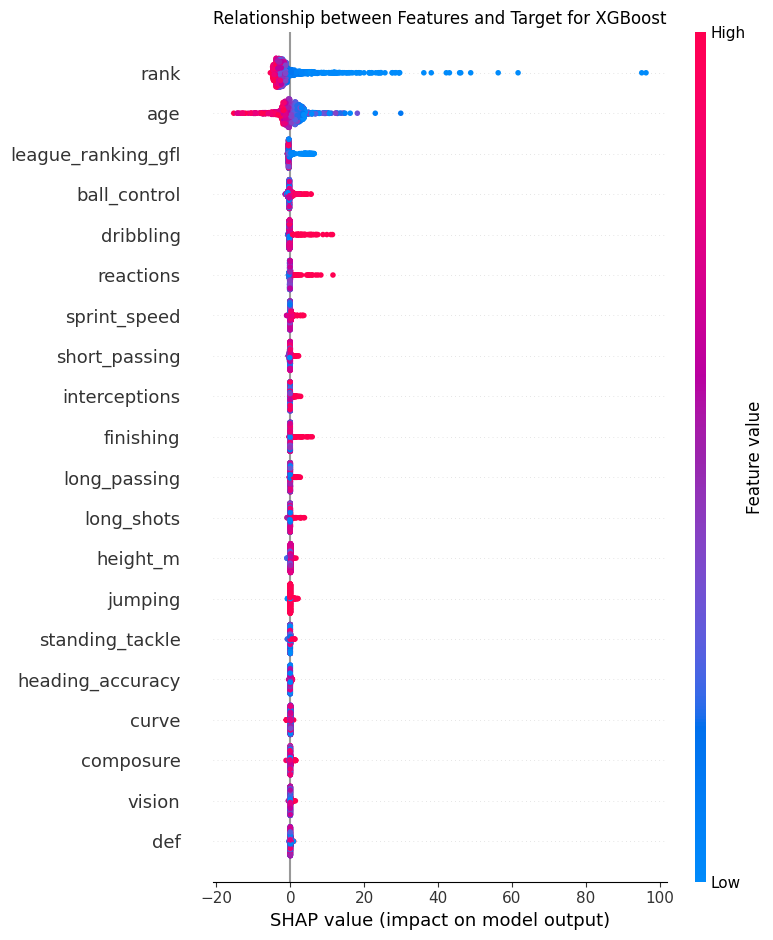

In [ ]:
explainer = shap.TreeExplainer(xgb_tuned)
shap_values_test = explainer.shap_values(X_test)  # 计算量 = n_samples × n_features

# —— 2. 全局重要性可视化（Bar 图）——
shap.summary_plot(
    shap_values_test, X_test,
    plot_type="bar",
    feature_names=X_test.columns,
    max_display=20,
    show=False)
plt.title("Top 20 Important Features for XGBoost")
plt.tight_layout()
plt.show()

# —— 3. 全局关系型重要性（Beeswarm）——
shap.summary_plot(
    shap_values_test, X_test,
    feature_names=X_test.columns,
    max_display=20,
    show=False
)
plt.title("Relationship between Features and Target for XGBoost")
plt.tight_layout()
plt.show()

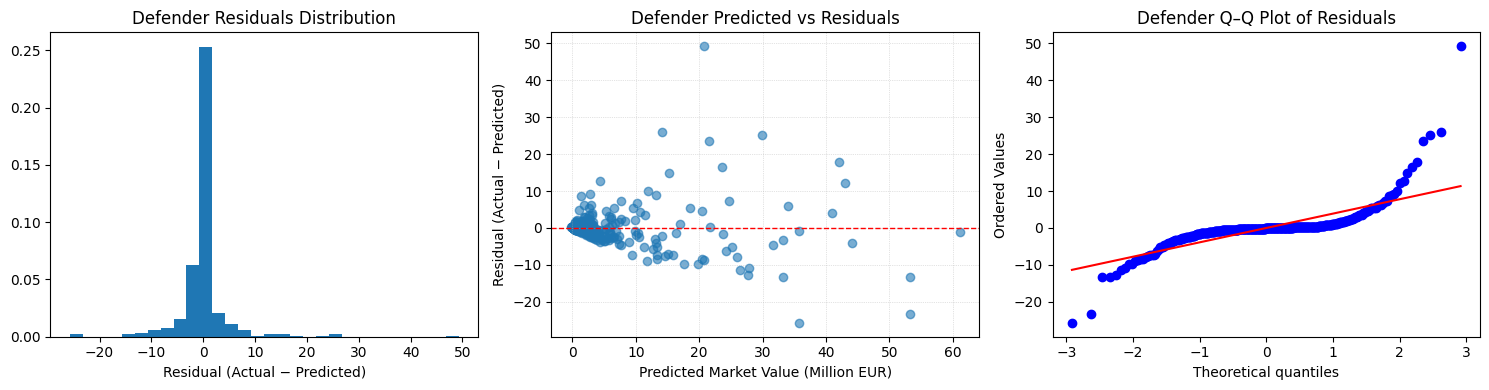

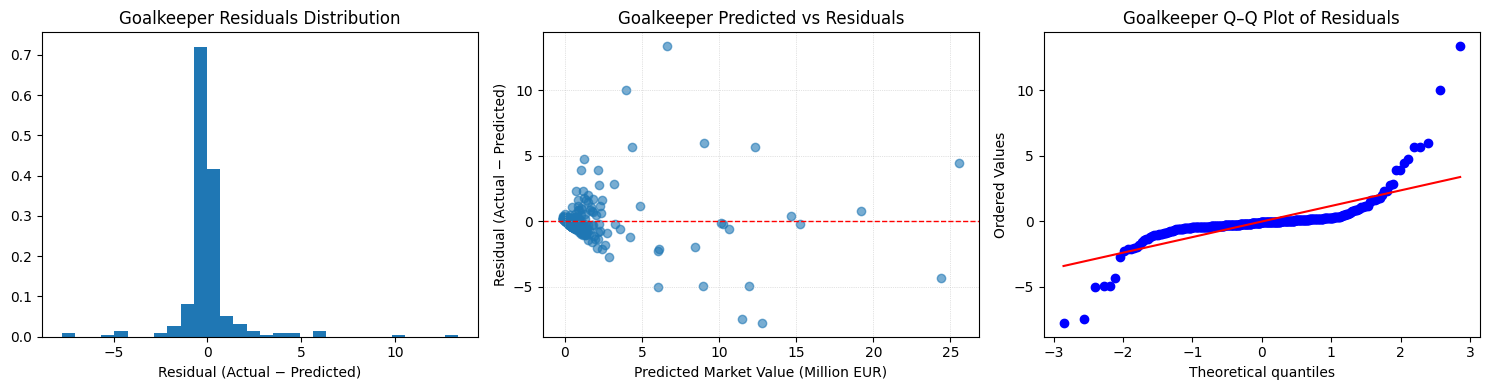

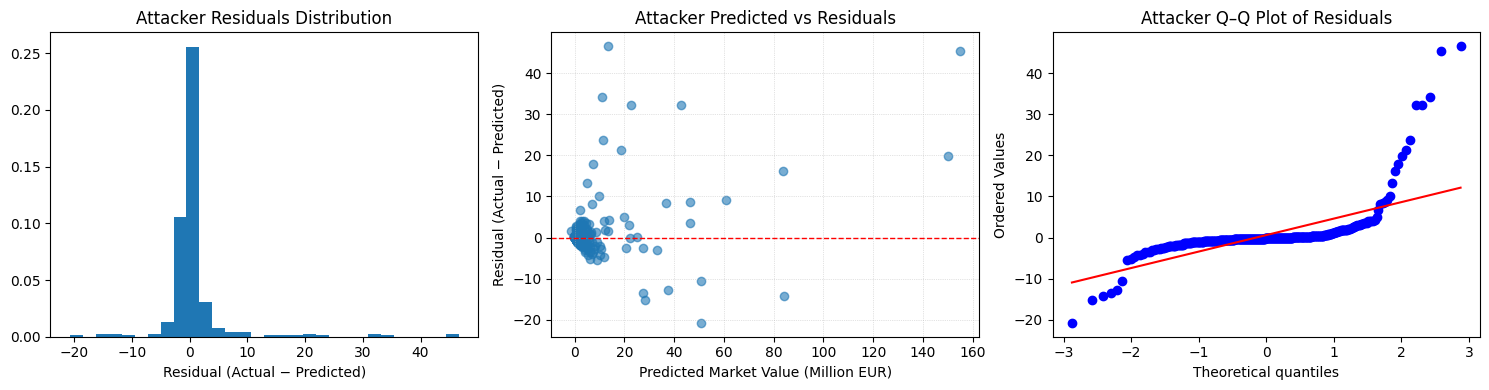

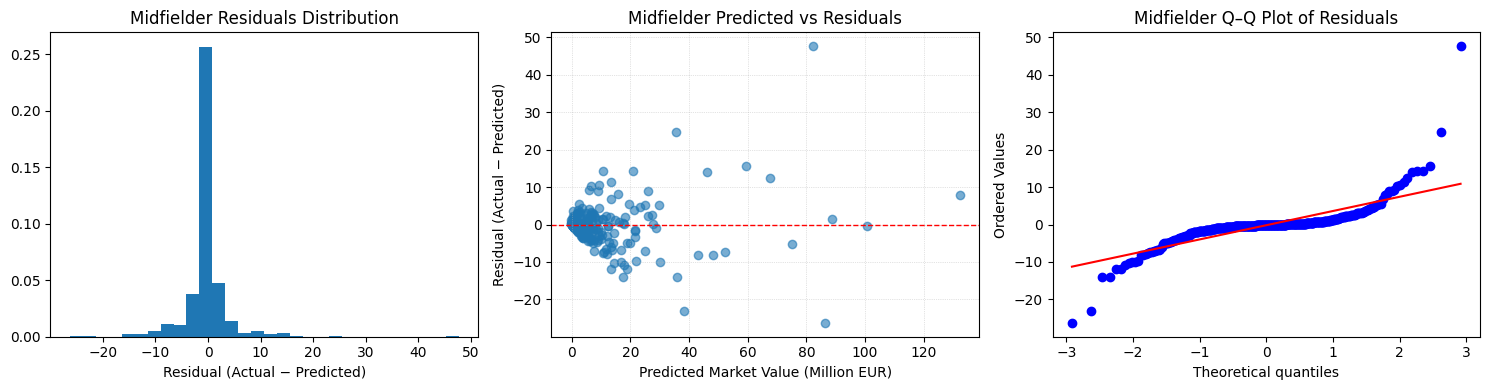

In [ ]:
# —— 1. 读取训练集 ——
train_df = pd.read_csv('/content/drive/MyDrive/fc25_train_scaled_million.csv')

# —— 2. 定义排除列并构造 X_train, y_train ——
exclude = [
    'market_value_million', 'market_value_in_eur', 'position',
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
    'gk_reflexes', 'position_group', 'name'
]
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_million']

# —— 3. 读取测试集并构造 X_test, y_test ——
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_scaled_million.csv')
X_test = test_df.drop(columns=exclude)
# 保证列顺序一致
X_test = X_test[X_train.columns]
y_test = test_df['market_value_million']

# —— 4. 训练并预测 ——


# —— 5. 把预测和残差放到 test_df ——
test_df = test_df.copy()
test_df['pred']     = y_pred_2
test_df['residual'] = test_df['market_value_million'] - test_df['pred']

import matplotlib.pyplot as plt
from scipy import stats

# 假设 test_df 已经包含 'position', 'pred', 'residual' 列
positions = test_df['position_group'].unique()

for pos in positions:
    sub = test_df[test_df['position_group'] == pos]
    preds = sub['pred']
    residuals = sub['residual']

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # 1) Residuals Distribution
    axes[0].hist(residuals, bins=30,density=True)
    axes[0].set_title(f'{pos} Residuals Distribution')
    axes[0].set_xlabel('Residual (Actual − Predicted)')

    # 2) Predicted vs Residuals
    axes[1].scatter(preds, residuals, alpha=0.6)
# 加一条水平参考线 y=0
    axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[1].set_title(f'{pos} Predicted vs Residuals')
    axes[1].set_xlabel('Predicted Market Value (Million EUR)')
    axes[1].set_ylabel('Residual (Actual − Predicted)')
# 加网格，增强可读性
    axes[1].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    # 3) Q–Q Plot of Residuals
    stats.probplot(residuals, dist="norm", plot=axes[2])
    axes[2].set_title(f'{pos} Q–Q Plot of Residuals')

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load test set
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_scaled_million.csv')

# 2. Prepare X_test and y_test (ensure same feature order as training)
exclude = [
    'market_value_million','market_value_in_eur','position',
    'gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes',
    'position_group','name'
]
X_test_full = test_df.drop(columns=exclude)
X_test_full = X_test_full[X_train.columns]  # align columns
y_test_full = test_df['market_value_million']

# 3. Define position groups
groups = ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper']

# 4. Evaluate tuned Random Forest on each subset
for grp in groups:
    idx = test_df['position_group'] == grp
    X_grp = X_test_full.loc[idx]
    y_grp = y_test_full.loc[idx]

    # Predict with your tuned RF model (best_rf)
    y_pred = xgb_tuned.predict(X_grp)

    rmse = np.sqrt(mean_squared_error(y_grp, y_pred))
    mae  = mean_absolute_error(y_grp, y_pred)
    r2   = r2_score(y_grp, y_pred)

    print(f"\n=== Tuned XGB Test for {grp} ===")
    print(f"Samples: {len(y_grp)}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")



=== Tuned XGB Test for Attacker ===
Samples: 345
RMSE: 5.9109
MAE : 2.1369
R²  : 0.8947

=== Tuned XGB Test for Midfielder ===
Samples: 389
RMSE: 4.7276
MAE : 2.1810
R²  : 0.9072

=== Tuned XGB Test for Defender ===
Samples: 389
RMSE: 5.0062
MAE : 2.1567
R²  : 0.7465

=== Tuned XGB Test for Goalkeeper ===
Samples: 327
RMSE: 1.5621
MAE : 0.6833
R²  : 0.7866


LightGBM

In [ ]:

# 1. 导入并构建 LGBM
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_scaled_million.csv')
exclude = [
    'market_value_million','market_value_in_eur','position',
    'gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes',
    'position_group','name'
]
X = df.drop(columns=exclude)
y = df['market_value_million']

# 3. 定义一个简单的交叉验证评估
def evaluate_model(model, X, y, stratify, label="Model", n_splits=5, seeds=[91,22,67,2025,623]):
    rmse_scores, mae_scores, r2_scores = [], [], []
    for seed in seeds:
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
        for train_idx, val_idx in skf.split(X, stratify):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
            mae_scores.append(mean_absolute_error(y_val, y_pred))
            r2_scores.append(r2_score(y_val, y_pred))

    print(f"\n📊 Evaluation for {label}")
    print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
    print(f"MAE : {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
    print(f"R²  : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
    # return rmse_scores, mae_scores, r2_scores
    # 📌 3. 特征选择与分层
exclude = ['market_value_million', 'market_value_in_eur', 'position','gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'position_group', 'name']
X = df.drop(columns=exclude)
strata = df['position']

# 📌 4. XGBoost 模型（默认参数）
lgbm = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)


# ✅ 使用原始 market_value_in_eur
y_raw = df['market_value_million']
evaluate_model(lgbm, X, y_raw, strata, label="LightGBM Default - Market Value")



📊 Evaluation for LightGBM Default - Market Value
RMSE: 5.4464 ± 0.7639
MAE : 2.0166 ± 0.1074
R²  : 0.7846 ± 0.0359


In [ ]:
# 2. 定义 LightGBM 模型
lgbm = LGBMRegressor(random_state=42, n_jobs=-1)

# 3. 定义随机搜索的超参分布
param_dist = {
    'n_estimators':       randint(100, 1001),
    'learning_rate':      uniform(0.01, 0.29),
    'max_depth':          randint(3, 13),
    'num_leaves':         randint(20, 151),
    'min_child_samples':  randint(5, 101),
    'subsample':          uniform(0.6, 0.4),
    'colsample_bytree':   uniform(0.6, 0.4),
    'min_split_gain':     uniform(0, 0.5)
}

# 4. 设置 5 折交叉验证和评分
cv = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 5. 构建 RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=100,               # 尝试 100 组参数
    scoring=mae_scorer,
    cv=cv,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# 6. 执行超参搜索
rs.fit(X, y_raw)

# 7. 输出最优参数和 CV MAE
print("Best LightGBM params:")
for k, v in rs.best_params_.items():
    print(f"  {k}: {v}")
print(f"Best CV MAE: {-rs.best_score_:.4f} Million EUR")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best LightGBM params:
  colsample_bytree: 0.9960215400417053
  learning_rate: 0.050624364418591965
  max_depth: 12
  min_child_samples: 6
  min_split_gain: 0.16127538211930026
  n_estimators: 203
  num_leaves: 62
  subsample: 0.8835643987640474
Best CV MAE: 1.9827 Million EUR


In [ ]:
lgbm_tuned = rs.best_estimator_

# ✅ 使用原始 market_value_in_eur
y_raw = df['market_value_million']
evaluate_model(lgbm_tuned, X, y_raw, strata, label="LightGBM Tuned - Market Value")


📊 Evaluation for LightGBM Tuned - Market Value
RMSE: 5.4946 ± 0.7478
MAE : 1.9936 ± 0.1106
R²  : 0.7803 ± 0.0372


In [ ]:
# 假设你已经有一个预先切分好的测试集 CSV
df_test = pd.read_csv('/content/drive/MyDrive/fc25_test_scaled_million.csv')

# 同样做你在训练集上做的所有清洗／预处理
exclude = [
    'market_value_million','market_value_in_eur','position',
    'gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes',
    'position_group','name'
]
X_test = df_test.drop(columns=exclude)
y_test = df_test['market_value_million']

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lgbm_tuned.fit(X, y_raw)
y_pred_3 = lgbm_tuned.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_3))
mae_test  = mean_absolute_error(y_test, y_pred_3)
r2_test   = r2_score(y_test, y_pred_3)

print(f"Test RMSE: {rmse_test:.4f} ")
print(f"Test MAE : {mae_test:.4f} ")
print(f"Test R²  : {r2_test:.4f}")


Test RMSE: 4.8573 
Test MAE : 1.8424 
Test R²  : 0.8661


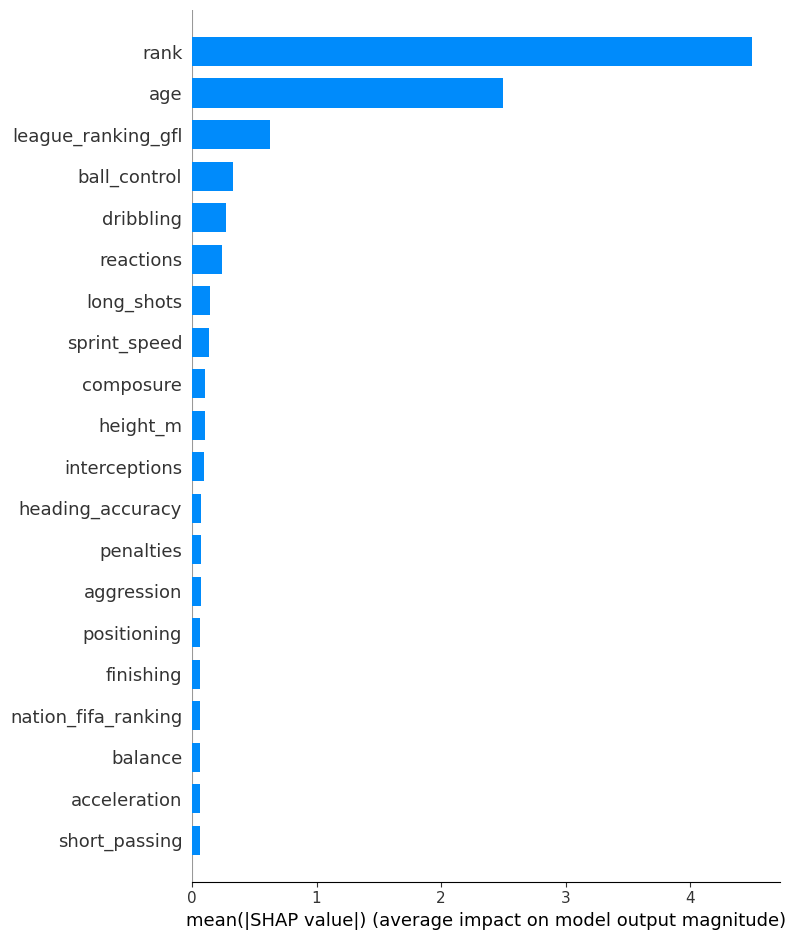

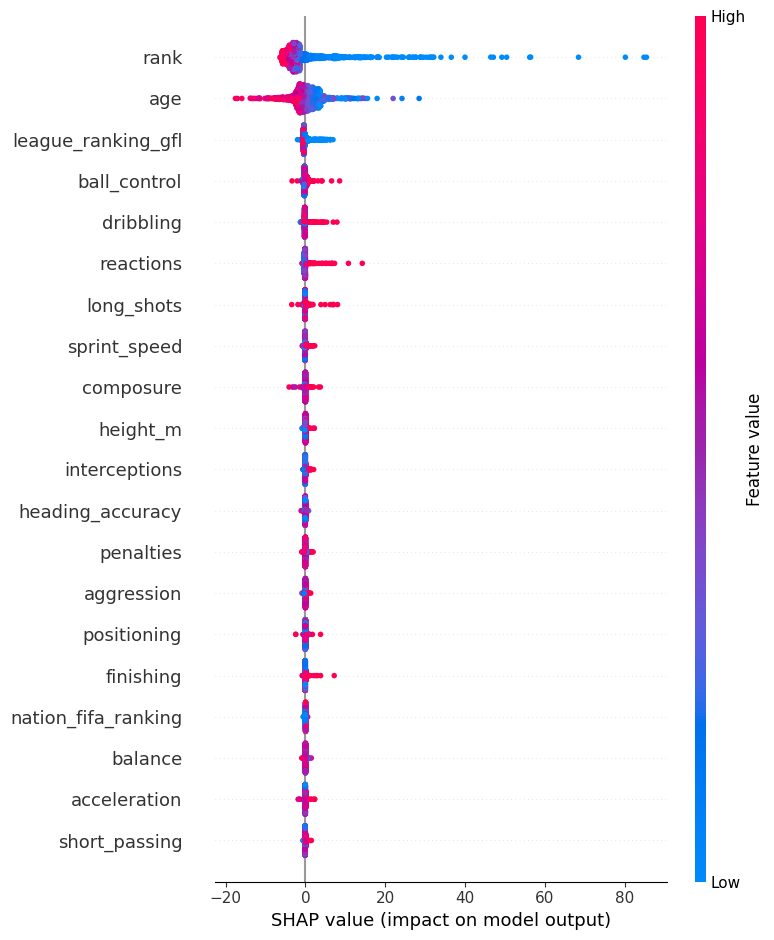

In [ ]:
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values_test = explainer.shap_values(X_test)  # 计算量 = n_samples × n_features

# —— 2. 全局重要性可视化（Bar 图）——
shap.summary_plot(
    shap_values_test, X_test,
    plot_type="bar",
    feature_names=X_test.columns,
    max_display=20)

# —— 3. 全局关系型重要性（Beeswarm）——
shap.summary_plot(
    shap_values_test, X_test,
    feature_names=X_test.columns,
    max_display=20
)

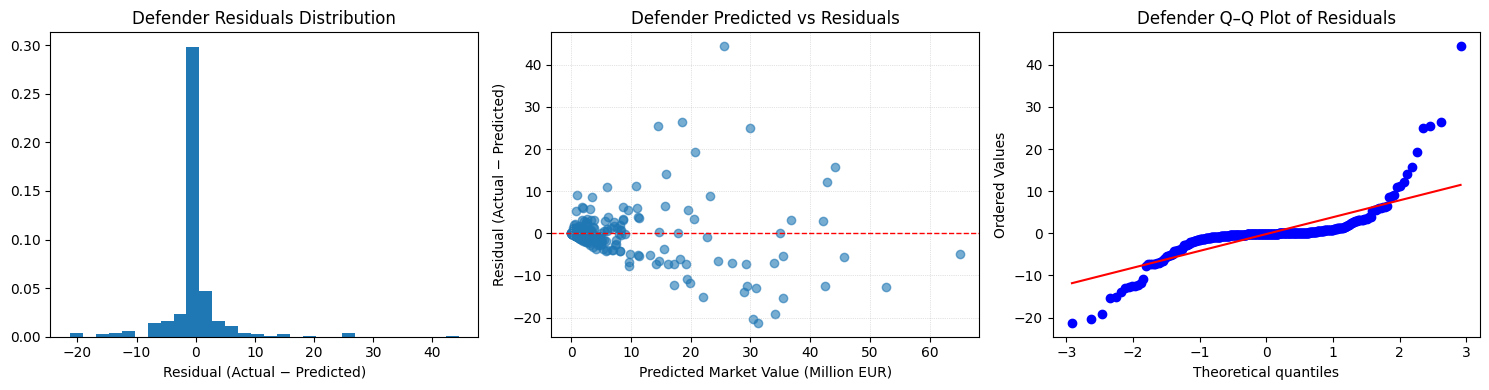

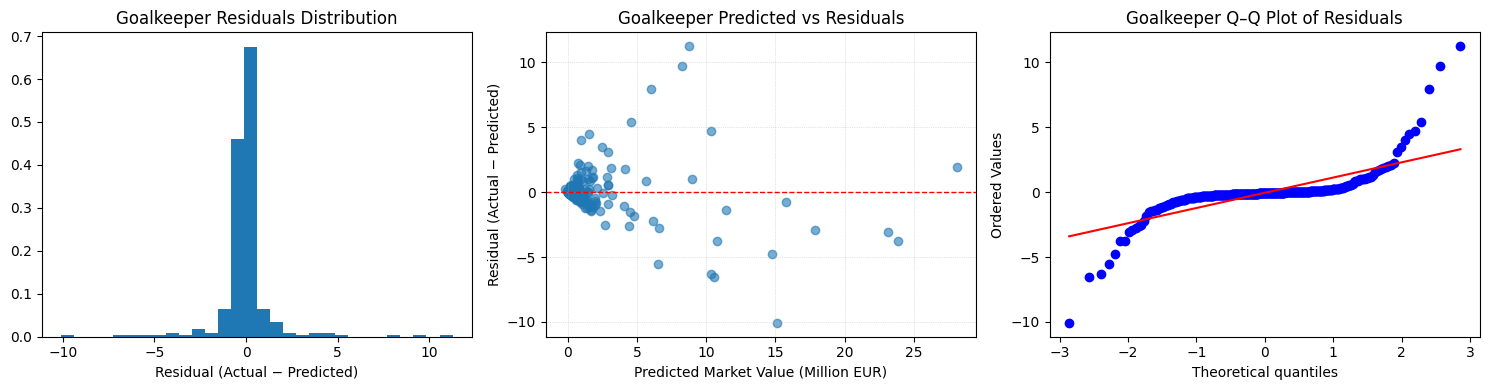

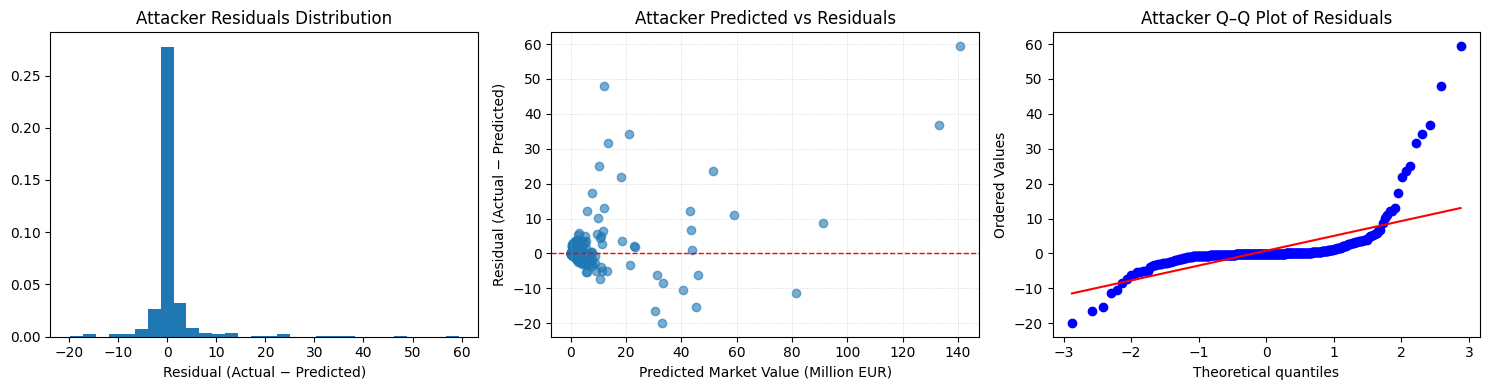

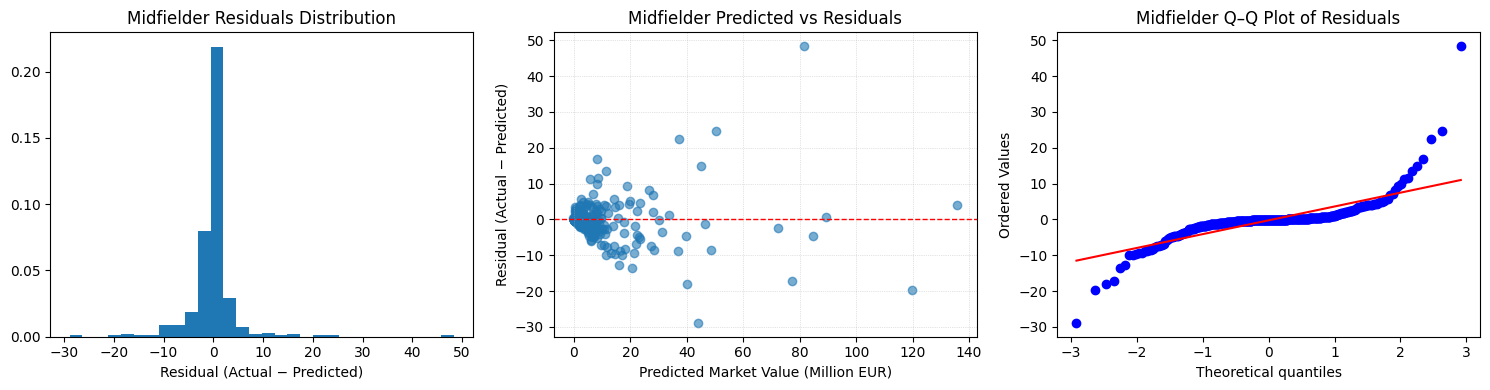

In [ ]:
# —— 1. 读取训练集 ——
train_df = pd.read_csv('/content/drive/MyDrive/fc25_train_scaled_million.csv')

# —— 2. 定义排除列并构造 X_train, y_train ——
exclude = [
    'market_value_million', 'market_value_in_eur', 'position',
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
    'gk_reflexes', 'position_group', 'name'
]
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_million']

# —— 3. 读取测试集并构造 X_test, y_test ——
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_scaled_million.csv')
X_test = test_df.drop(columns=exclude)
# 保证列顺序一致
X_test = X_test[X_train.columns]
y_test = test_df['market_value_million']

# —— 4. 训练并预测 ——


# —— 5. 把预测和残差放到 test_df ——
test_df = test_df.copy()
test_df['pred']     = y_pred_3
test_df['residual'] = test_df['market_value_million'] - test_df['pred']

import matplotlib.pyplot as plt
from scipy import stats

# 假设 test_df 已经包含 'position', 'pred', 'residual' 列
positions = test_df['position_group'].unique()

for pos in positions:
    sub = test_df[test_df['position_group'] == pos]
    preds = sub['pred']
    residuals = sub['residual']

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # 1) Residuals Distribution
    axes[0].hist(residuals, bins=30,density=True)
    axes[0].set_title(f'{pos} Residuals Distribution')
    axes[0].set_xlabel('Residual (Actual − Predicted)')

    # 2) Predicted vs Residuals
    axes[1].scatter(preds, residuals, alpha=0.6)
# 加一条水平参考线 y=0
    axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[1].set_title(f'{pos} Predicted vs Residuals')
    axes[1].set_xlabel('Predicted Market Value (Million EUR)')
    axes[1].set_ylabel('Residual (Actual − Predicted)')
# 加网格，增强可读性
    axes[1].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

    # 3) Q–Q Plot of Residuals
    stats.probplot(residuals, dist="norm", plot=axes[2])
    axes[2].set_title(f'{pos} Q–Q Plot of Residuals')

    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load test set
test_df = pd.read_csv('/content/drive/MyDrive/fc25_test_scaled_million.csv')

# 2. Prepare X_test and y_test (ensure same feature order as training)
exclude = [
    'market_value_million','market_value_in_eur','position',
    'gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes',
    'position_group','name'
]
X_test_full = test_df.drop(columns=exclude)
X_test_full = X_test_full[X_train.columns]  # align columns
y_test_full = test_df['market_value_million']

# 3. Define position groups
groups = ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper']

# 4. Evaluate tuned Random Forest on each subset
for grp in groups:
    idx = test_df['position_group'] == grp
    X_grp = X_test_full.loc[idx]
    y_grp = y_test_full.loc[idx]

    # Predict with your tuned RF model (best_rf)
    y_pred = lgbm_tuned.predict(X_grp)

    rmse = np.sqrt(mean_squared_error(y_grp, y_pred))
    mae  = mean_absolute_error(y_grp, y_pred)
    r2   = r2_score(y_grp, y_pred)

    print(f"\n=== Tuned LightGBM Test for {grp} ===")
    print(f"Samples: {len(y_grp)}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")



=== Tuned LightGBM Test for Attacker ===
Samples: 345
RMSE: 6.4205
MAE : 2.1953
R²  : 0.8757

=== Tuned LightGBM Test for Midfielder ===
Samples: 389
RMSE: 4.8739
MAE : 2.1827
R²  : 0.9014

=== Tuned LightGBM Test for Defender ===
Samples: 389
RMSE: 5.0592
MAE : 2.1998
R²  : 0.7411

=== Tuned LightGBM Test for Goalkeeper ===
Samples: 327
RMSE: 1.5562
MAE : 0.6399
R²  : 0.7882
